In [27]:
import pandas as pd
import numpy   as np
import seaborn as sns
import pycaret as py
import sklearn

In [28]:
data = pd.read_csv("Predictions_Pannes_Voitures.csv")

In [29]:
data.head()

,Age_de_la_voiture,Kilometrage,Type_de_carburant,Nombre_de_reparations,Derniere_revision_mois,Nombre_de_proprietaires,Marque,Modele,Panne_dans_12_mois
0,6,11302,Essence,6,8,1,Volkswagen,Modèle D,Non
1,19,41157,Diesel,5,11,3,Volkswagen,Modèle A,Oui
2,14,54917,Essence,8,8,4,Volkswagen,Modèle B,Non
3,10,223810,Electrique,3,4,4,Renault,Modèle A,Non
4,7,96646,Diesel,0,2,3,Renault,Modèle A,Non


In [30]:
data.dtypes

Age_de_la_voiture           int64
Kilometrage                 int64
Type_de_carburant          object
Nombre_de_reparations       int64
Derniere_revision_mois      int64
Nombre_de_proprietaires     int64
Marque                     object
Modele                     object
Panne_dans_12_mois         object
dtype: object

In [31]:
data.Type_de_carburant.unique()

array(['Essence', 'Diesel', 'Electrique'], dtype=object)

In [32]:
data.Type_de_carburant.replace(['Essence',	'Diesel',	'Electrique'],[0,1,2], inplace=True)

In [33]:
data.head()

,Age_de_la_voiture,Kilometrage,Type_de_carburant,Nombre_de_reparations,Derniere_revision_mois,Nombre_de_proprietaires,Marque,Modele,Panne_dans_12_mois
0,6,11302,0,6,8,1,Volkswagen,Modèle D,Non
1,19,41157,1,5,11,3,Volkswagen,Modèle A,Oui
2,14,54917,0,8,8,4,Volkswagen,Modèle B,Non
3,10,223810,2,3,4,4,Renault,Modèle A,Non
4,7,96646,1,0,2,3,Renault,Modèle A,Non


In [34]:
data.Marque.unique()

array(['Volkswagen', 'Renault', 'Honda', 'Tesla', 'Toyota', 'Ford',
       'Peugeot'], dtype=object)

In [35]:
data.Marque.replace(['Volkswagen', 'Renault', 'Honda', 'Tesla', 'Toyota', 'Ford',
       'Peugeot'],[0,1,2,3,4,5,6], inplace=True)

In [36]:
data.dtypes

Age_de_la_voiture           int64
Kilometrage                 int64
Type_de_carburant           int64
Nombre_de_reparations       int64
Derniere_revision_mois      int64
Nombre_de_proprietaires     int64
Marque                      int64
Modele                     object
Panne_dans_12_mois         object
dtype: object

In [37]:
data.Modele.unique()

array(['Modèle D', 'Modèle A', 'Modèle B', 'Modèle C'], dtype=object)

In [38]:
data.Modele.replace(['Modèle D',	'Modèle A'	,'Modèle B',	'Modèle C'],[0,1,2,3], inplace=True)

In [39]:
data.head()

,Age_de_la_voiture,Kilometrage,Type_de_carburant,Nombre_de_reparations,Derniere_revision_mois,Nombre_de_proprietaires,Marque,Modele,Panne_dans_12_mois
0,6,11302,0,6,8,1,0,0,Non
1,19,41157,1,5,11,3,0,1,Oui
2,14,54917,0,8,8,4,0,2,Non
3,10,223810,2,3,4,4,1,1,Non
4,7,96646,1,0,2,3,1,1,Non


In [40]:
data.isna().sum()

Age_de_la_voiture          0
Kilometrage                0
Type_de_carburant          0
Nombre_de_reparations      0
Derniere_revision_mois     0
Nombre_de_proprietaires    0
Marque                     0
Modele                     0
Panne_dans_12_mois         0
dtype: int64

In [41]:
data.Panne_dans_12_mois.unique()

array(['Non', 'Oui'], dtype=object)

In [42]:
data.Panne_dans_12_mois.replace(['Non'	,'Oui'],[0,1], inplace=True)

In [43]:
data.head()

,Age_de_la_voiture,Kilometrage,Type_de_carburant,Nombre_de_reparations,Derniere_revision_mois,Nombre_de_proprietaires,Marque,Modele,Panne_dans_12_mois
0,6,11302,0,6,8,1,0,0,0
1,19,41157,1,5,11,3,0,1,1
2,14,54917,0,8,8,4,0,2,0
3,10,223810,2,3,4,4,1,1,0
4,7,96646,1,0,2,3,1,1,0


In [44]:
from pycaret.classification import *

<Axes: >

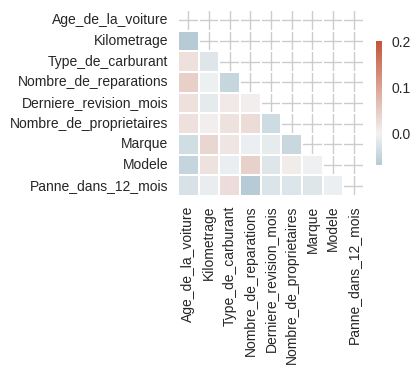

In [45]:
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(3,4))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=.2, center=0,
square=True, linewidths=.3, cbar_kws={"shrink": .4})

In [46]:
s= setup(data=data, train_size=0.8, session_id=123, target='Panne_dans_12_mois')

,Description,Value
0,Session id,123
1,Target,Panne_dans_12_mois
2,Target type,Binary
3,Original data shape,"(900, 9)"
4,Transformed data shape,"(900, 9)"
5,Transformed train set shape,"(720, 9)"
6,Transformed test set shape,"(180, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [47]:
model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7931,0.5196,0.0000,0.0000,0.0000,0.0000,0.0000,1.1200
nb,Naive Bayes,0.7931,0.5061,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550
ridge,Ridge Classifier,0.7931,0.5138,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
lda,Linear Discriminant Analysis,0.7931,0.5138,0.0000,0.0000,0.0000,0.0000,0.0000,0.0380
dummy,Dummy Classifier,0.7931,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0310
catboost,CatBoost Classifier,0.7889,0.5243,0.0267,0.3500,0.0493,0.0225,0.0565,1.7050
ada,Ada Boost Classifier,0.7875,0.4799,0.0133,0.0833,0.0229,0.0039,0.0038,0.1360
qda,Quadratic Discriminant Analysis,0.7861,0.5633,0.0000,0.0000,0.0000,-0.0132,-0.0269,0.0340
et,Extra Trees Classifier,0.7861,0.5343,0.0333,0.3167,0.0590,0.0239,0.0490,0.3580
rf,Random Forest Classifier,0.7847,0.5280,0.0067,0.1000,0.0125,-0.0083,-0.0156,0.2370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
model= create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8056,0.5246,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7917,0.5380,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7917,0.4889,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7917,0.3041,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7917,0.5766,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7917,0.6012,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7917,0.5649,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7917,0.5310,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7917,0.5977,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
import pickle
pickle.dump(model, open('panneVehicule.pkl', 'wb'))